In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import operator

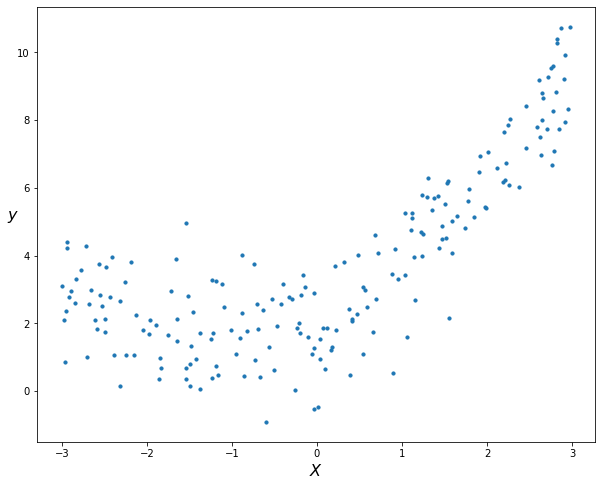

In [121]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(200, 1)

fig = plt.figure(figsize=(10,8))
_ = plt.scatter(X,y,s=10)
_ = plt.xlabel("$X$", fontsize=16)
_ = plt.ylabel("$y$", rotation=0, fontsize=16)

In [122]:
#Using Plotly
go.Figure(go.Scatter(x=X[:,0], y=y[:,0], mode='markers'))

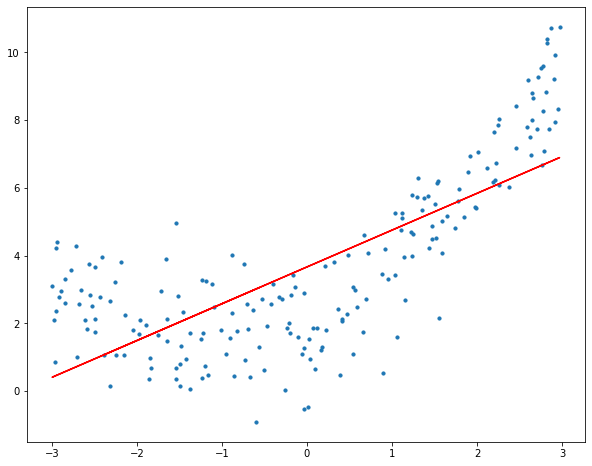

In [123]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = plt.figure(figsize=(10,8))
_ = plt.scatter(X, y, s=10)
_ = plt.plot(X, y_pred, color='r')
plt.show()

In [124]:
from sklearn.metrics import r2_score

print(f"R-Squared of the model is {r2_score(y, y_pred)}")

R-Squared of the model is 0.5479173841858733


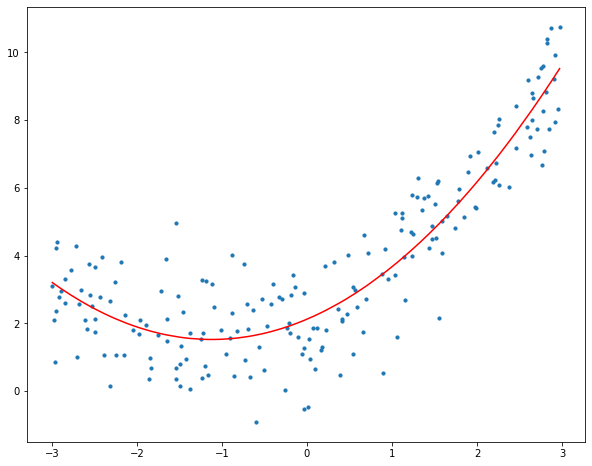

In [174]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
r2 = r2_score(y,y_poly_pred)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
fig = plt.figure(figsize=(10,8))
_ = plt.scatter(X, y, s=10)
_ = plt.plot(x, y_poly_pred, color='r')
plt.show()

In [137]:
print(f"R-Squared of the model is {r2}")

R-Squared of the model is 0.8242378566950601


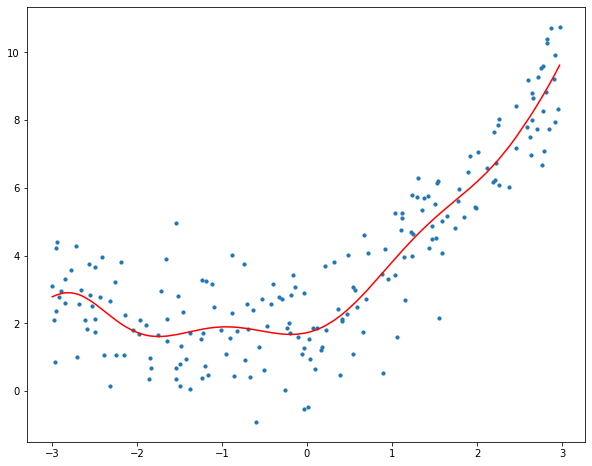

R-Squared of the model is 0.831777739222978


In [142]:
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
r2 = r2_score(y,y_poly_pred)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
fig = plt.figure(figsize=(10,8))
_ = plt.scatter(X, y, s=10)
_ = plt.plot(x, y_poly_pred, color='r')
plt.show()

print(f"R-Squared of the model is {r2}")

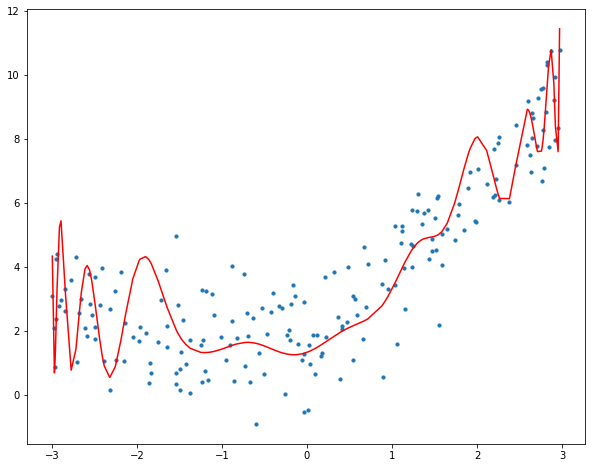

R-Squared of the model is 0.7419383093794893


In [181]:
polynomial_features= PolynomialFeatures(degree=30)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred30 = model.predict(x_poly)
r2 = r2_score(y,y_poly_pred30)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred30), key=sort_axis)
x, y_poly_pred30 = zip(*sorted_zip)
fig = plt.figure(figsize=(10,8))
_ = plt.scatter(X, y, s=10)
_ = plt.plot(x, y_poly_pred30, color='r')
plt.show()

print(f"R-Squared of the model is {r2}")

In [188]:
plt.figure?

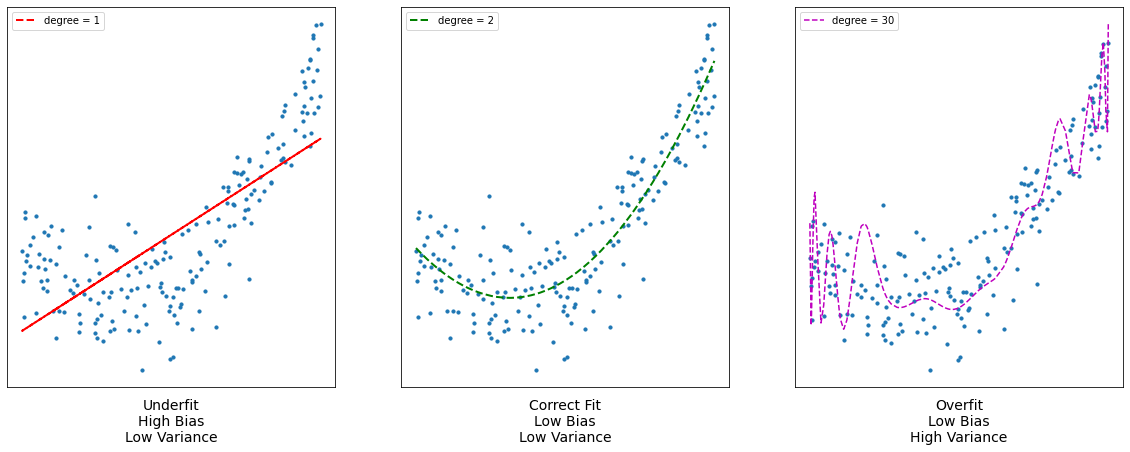

In [202]:
plt.figure(figsize=(20,7))
plt.subplot(131)
_ = plt.scatter(X, y, s=10)
_ = plt.plot(X, y_pred, '--',linewidth=2,color='r', label = "degree = 1")
plt.legend()
plt.xlabel("Underfit\nHigh Bias\nLow Variance",fontsize=14)
ax = plt.gca()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.tick_params(left = False)
plt.tick_params(bottom = False)


plt.subplot(132)
_ = plt.scatter(X, y, s=10)
_ = plt.plot(x, y_poly_pred, '--',linewidth=2,color='g',label = "degree = 2")
plt.legend()
plt.xlabel("Correct Fit\nLow Bias\nLow Variance",fontsize=14)
ax = plt.gca()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.tick_params(left = False)
plt.tick_params(bottom = False)


plt.subplot(133)
_ = plt.scatter(X, y, s=10)
_ = plt.plot(x, y_poly_pred30, '--',color='m', label = "degree = 30")
plt.legend()
plt.xlabel("Overfit\nLow Bias\nHigh Variance",fontsize=14)
ax = plt.gca()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.tick_params(left = False)
plt.tick_params(bottom = False)

In [95]:
mymodel = np.poly1d(np.polyfit(X[:,0], y[:,0], 2))

myline = np.linspace(X.min(), X.max(), X.shape[0])

In [111]:
y_pred_poly = mymodel(X)

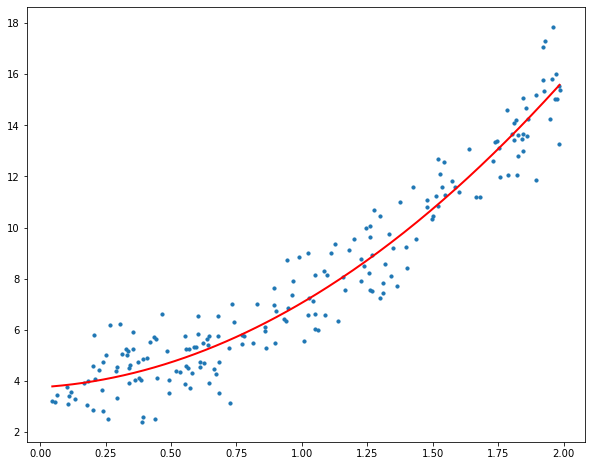

In [105]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X, y, s=10)
plt.plot(myline, mymodel(myline), linewidth=2,c='r')
plt.show()

In [203]:
#Own implementation (using GD)

def loss(y, y_hat):

    loss = np.mean((y_hat - y)**2)
    return loss

def gradients(X, y, y_hat):
    
    m = X.shape[0]
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def x_transform(X, degrees):
    
    t = X.copy()
    for i in degrees:
        X = np.append(X, t**i, axis=1)
            
    return X

def train(X, y, bs, degrees, epochs, lr):
    
    x = x_transform(X, degrees)
    m, n = x.shape
    w = np.zeros((n,1))
    b = 0
    y = y.reshape(m,1)
    
    losses = []
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
    
            y_hat = np.dot(xb, w) + b
            dw, db = gradients(xb, yb, y_hat)
            w -= lr*dw
            b -= lr*db
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    return w, b, losses

def predict(X, w, b, degrees):
    
    x1 = x_transform(X, degrees)
    return np.dot(x1, w) + b

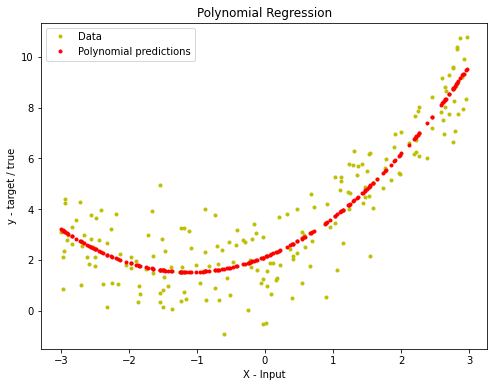

In [206]:
w, b, l = train(X, y, bs=100, degrees=[2], epochs=1000,lr=0.01)
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b, [2]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

In [207]:
r2_score(y, predict(X, w, b, [2]))

0.8242362012250128